In [1]:
######################################################################
# Author: Ilje Cho, Rohan Dahale, Date: 14 Mar 2024
######################################################################

# Import libraries
import numpy as np
import pandas as pd
import ehtim as eh
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pdb

import argparse
import os
import glob
from tqdm import tqdm
import itertools 
import sys
from copy import copy

######################################################################
# Plotting Setup
######################################################################
#plt.rc('text', usetex=True)
import matplotlib as mpl
#mpl.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
mpl.rcParams['figure.dpi']=100
#mpl.rcParams["mathtext.default"] = 'regular'
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"
#plt.style.use('dark_background')

mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
mpl.rcParams["legend.fontsize"] = 18

from matplotlib import font_manager
font_dirs = font_manager.findSystemFonts(fontpaths='./fonts/', fontext="ttf")
#mpl.rc('text', usetex=True)

fe = font_manager.FontEntry(
    fname='./fonts/Helvetica.ttf',
    name='Helvetica')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
######################################################################

Welcome to eht-imaging! v 1.2.4 



In [2]:
# Time average data to 60s
#obs = eh.obsdata.load_uvfits('/mnt/disks/shared/eht/sgra_dynamics_april11/evaluation/scripts/VLX/data/hops_3601_SGRA_LO_netcal_LMTcal_10s_ALMArot_dcal.uvfits')
obs = eh.obsdata.load_uvfits('/mnt/disks/shared/eht/sgra_dynamics_april11/reference_data/real_data/2017april11/hops/hops_3601_SGRA_LO_netcal_LMTcal_10s_ALMArot_dcal.uvfits')
obs = obs.avg_coherent(60.0)

obs = obs.add_fractional_noise(0.02)
import ehtim.scattering.stochastic_optics as so
sm = so.ScatteringModel()
obs = sm.Deblur_obs(obs)

Loading uvfits:  /mnt/disks/shared/eht/sgra_dynamics_april11/reference_data/real_data/2017april11/hops/hops_3601_SGRA_LO_netcal_LMTcal_10s_ALMArot_dcal.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/mnt/disks/shared/eht/softwares/miniconda3/lib/python3.9/site-packages/ehtim/scattering/stochastic_optics.py:115: OptimizeWarning: Unknown solver options: xtol
  self.kzeta = minimize(dipole_Anisotropy, A, method='nelder-mead', options={'xtol': 1e-8, 'disp': False}).x


In [3]:
amp = pd.DataFrame(obs.data)

obs.add_scans()
times = []
for t in obs.scans:
    times.append(t[0])
obslist = obs.split_obs()

Splitting Observation File into 164 times


/mnt/disks/shared/eht/softwares/miniconda3/lib/python3.9/site-packages/ehtim/obsdata.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(datalist)


In [4]:
amp

,time,tint,t1,t2,tau1,tau2,u,v,vis,qvis,uvis,vvis,sigma,qsigma,usigma,vsigma
0,9.008333,30.000000,AA,AZ,0.0,0.0,2.749856e+09,-3.237101e+09,0.320150-0.032960j,0.030624+0.048798j,0.068320-0.042665j,-0.002410-0.005542j,0.008036,0.007694,0.007694,0.008036
1,9.008333,59.980928,AA,SP,0.0,0.0,5.615191e+07,4.726987e+09,0.237333-0.046697j,-0.110365+0.074319j,-0.078987-0.105119j,-0.000332-0.007256j,0.005916,0.005680,0.005680,0.005916
2,9.008333,29.865590,AZ,SP,0.0,0.0,-2.693564e+09,7.963443e+09,-0.026597-0.113462j,0.009070+0.005054j,0.028910+0.053984j,0.085361-0.087560j,0.078472,0.078461,0.078461,0.078472
3,9.025000,36.000000,AA,LM,0.0,0.0,2.264148e+09,-2.800389e+09,0.335126-0.027610j,0.010571+0.111007j,0.176114+0.005021j,0.014406+0.002183j,0.008060,0.007766,0.007766,0.008060
4,9.025000,50.000000,AA,AZ,0.0,0.0,2.754930e+09,-3.241967e+09,0.321727-0.020731j,0.028430+0.061887j,0.077184-0.030002j,-0.003443-0.004255j,0.007440,0.007222,0.007222,0.007440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,14.041667,60.000000,AZ,LM,0.0,0.0,-1.043566e+09,1.018870e+09,1.705176-0.377230j,-0.061395-0.066125j,-0.153333+0.274320j,-0.145615+0.021166j,0.047278,0.047278,0.047278,0.047278
1957,14.041667,60.000000,AZ,SP,0.0,0.0,2.293226e+09,8.114339e+09,-0.013992-0.024865j,-0.039245+0.029972j,-0.047421-0.169461j,-0.023972+0.001937j,0.059288,0.059287,0.059287,0.059288
1958,14.041667,39.990656,LM,SM,0.0,0.0,4.227733e+09,-7.061243e+08,0.496826-0.368189j,0.172735-0.155148j,0.003945-0.047976j,-0.073699+0.054467j,0.051654,0.051585,0.051585,0.051654
1959,14.041667,50.000000,LM,SP,0.0,0.0,3.336108e+09,7.095824e+09,0.278925+0.025803j,0.034125+0.089366j,-0.022454+0.048465j,-0.102675+0.022134j,0.073229,0.073132,0.073132,0.073229


In [5]:
def select_baseline(tab, st1, st2):
    stalist = list(itertools.permutations([st1, st2]))
    idx = []
    for stations in stalist:
        ant1, ant2 = stations
        subidx = np.where((tab["t1"].values == ant1) &
                          (tab["t2"].values == ant2) )
        idx +=  list(subidx[0])

    newtab = tab.take(idx).sort_values(by=["time"]).reset_index(drop=True)
    return newtab


In [6]:
obslist[0]

In [7]:
subtab  = select_baseline(amp, 'AA', 'SM')
subtab

,time,tint,t1,t2,tau1,tau2,u,v,vis,qvis,uvis,vvis,sigma,qsigma,usigma,vsigma
0,10.891667,19.995161,AA,SM,0.0,0.0,6.050117e+09,-2.332905e+09,0.049610+0.016204j,0.025065+0.009640j,0.000291+0.005307j,-0.009602+0.001198j,0.010403,0.009112,0.009112,0.010403
1,10.908333,39.994267,AA,SM,0.0,0.0,6.053966e+09,-2.340396e+09,0.054359+0.014895j,0.030726-0.008995j,-0.002154+0.011623j,-0.000251+0.019262j,0.009842,0.008624,0.008624,0.009842
2,10.925000,49.995799,AA,SM,0.0,0.0,6.061337e+09,-2.354962e+09,0.057660+0.005727j,0.026882+0.004130j,0.000146+0.004525j,-0.007693-0.007732j,0.008732,0.007657,0.007657,0.008732
3,10.941667,39.996482,AA,SM,0.0,0.0,6.067404e+09,-2.367185e+09,0.056330+0.008276j,0.028206-0.017843j,0.002898-0.001399j,-0.007399-0.000722j,0.009038,0.007923,0.007923,0.009038
4,10.958333,59.990288,AA,SM,0.0,0.0,6.073672e+09,-2.380065e+09,0.077143-0.012517j,0.016745-0.006055j,0.016067-0.005057j,-0.006554-0.025948j,0.007222,0.006361,0.006361,0.007222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,13.975000,39.994411,AA,SM,0.0,0.0,5.275929e+09,-4.682041e+09,0.205806-0.004903j,0.029087-0.006939j,0.025743-0.021149j,-0.016184+0.010904j,0.010239,0.009174,0.009174,0.010239
95,13.991667,39.993782,AA,SM,0.0,0.0,5.260103e+09,-4.694151e+09,0.176227-0.011995j,0.046793-0.019230j,0.045693-0.017239j,-0.009638-0.006098j,0.008603,0.007716,0.007716,0.008603
96,14.008333,59.991470,AA,SM,0.0,0.0,5.247843e+09,-4.703440e+09,0.188656+0.012615j,0.059005-0.027429j,0.043540-0.021334j,-0.010924-0.004308j,0.009905,0.008854,0.008854,0.009905
97,14.025000,59.978103,AA,SM,0.0,0.0,5.233043e+09,-4.714558e+09,0.204475-0.005548j,0.047477-0.021044j,0.051019-0.037835j,0.009339-0.010516j,0.010026,0.008989,0.008989,0.010026


In [ ]:
/mnt/disks/shared/eht/sgra_dynamics_april11/evaluation/scripts/VLX/recon/hops_3601_SGRA_LO_netcal_LMTcal_10s_ALMArot_dcal.hdf5

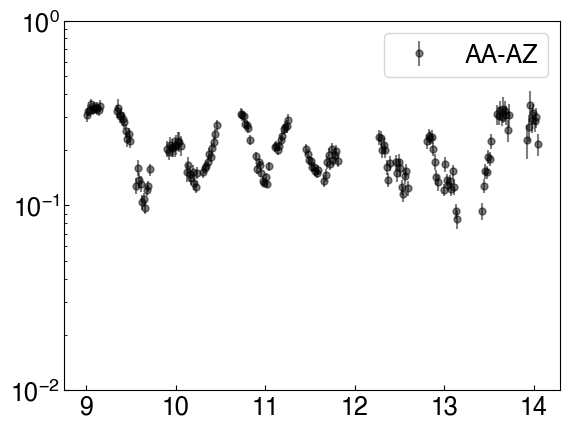

In [8]:
subtab  = select_baseline(amp, 'AA', 'AZ')
mbreve = abs(subtab['qvis']+1j*subtab['uvis']/subtab['vis'])
mbreve_sig = np.sqrt((mbreve**2)*(subtab['qsigma']**2-subtab['usigma']**2+(subtab['sigma']**2/abs(subtab['vis'])**2)))/abs(subtab['vis'])

plt.errorbar(subtab['time'], mbreve, yerr=mbreve_sig, c='black', mec='black', marker='o', ls="None", ms=5, alpha=0.5, label='AA-AZ')
plt.yscale('log')
plt.ylim(0.01,1)
plt.legend()